<a href="https://colab.research.google.com/github/ameschini2206/Prueba/blob/main/ProyectoDS_ParteI_Alejandro_Meschini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Primera Entrea - Visualizaciones en Python  
## Primera Entrega  
### Archivo: ProyectoDS_ParteI_Alejandro_Meschini.ipynb

---


## Abstract

En este proyecto trabajamos con el dataset autoelevadores_argentina.csv (este dataset fue creado con chatgpt y formó parte del proyecto entregado en el curso de data analytics) que contiene información sobre venta de autoleevadores, indicando fecha, marca, modelo, horas de uso y demas cuestiones relacionado con la venta.

El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos para identificar patrones relevantes, relaciones entre variables y posibles anomalías o factores que influyen en la venta de autoelevadores en Argentina. A través de gráficos univariados, bivariados y multivariados, se buscará responder una serie de preguntas o hipótesis planteadas sobre el comportamiento de los datos.

El análisis incluye una limpieza previa de datos, identificación de valores perdidos, y selección de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias, distribuciones y correlaciones. A partir de estos resultados visuales y numéricos se busca brindar una interpretación que permita entender mejor el fenómeno analizado.

El proyecto se estructura en etapas: definición de preguntas, diagnóstico visual, interpretación, y preparación para análisis posteriores como modelado o segmentación.

---

## Preguntas de interés / Hipótesis

1. ¿Que tipo de equipo es el mas vendido?

2. ¿Existe relación entre precio y horas de uso?

2. ¿Qué factores influyen más en el precio (marca, estado, capacidad, provincia)?

3. ¿Se pueden diferenciar grupos de equipos según estado, capacidad y horas?

4. ¿Qué variable numérica presenta mayor variabilidad? ¿Hay outliers?

5. ¿Cómo se distribuye el precio según la provincia y la marca?
---

##  Visualizaciones y Análisis

### 1. Análisis univariado

- Histograma y KDE del precio.

- Gráfico de barras de estado y provincia.

- Estadísticos descriptivos (media, mediana, std).


---

### 2. Análisis bivariado

- Boxplot de precio vs estado.

- Scatterplot de precio vs horas de uso.

- Matriz de correlaciones numéricas.


---

### 3. Análisis multivariado (mínimo 3 variables)

- Scatter 3D (precio vs horas, color por estado, tamaño por capacidad).

- Heatmap de correlaciones.

- Gráfico de violín: precio vs estado con hue por marca.

---

## Valores perdidos

- Cantidad y porcentaje de valores nulos por columna
- Decisión: eliminación / imputación / análisis posterior


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_proyecto:str = r'https://raw.githubusercontent.com/ameschini2206/Data-Science-I/refs/heads/main/autoelevadores_argentina.csv?token=GHSAT0AAAAAADJMAEEAEWSKKPWXFONOPYSK2GJ6FFQ'
df = pd.read_csv(url_proyecto)
df.head()



,ID_venta,Fecha_venta,Marca,Modelo,Tipo,Capacidad_kg,Altura_m,Precio_USD,Provincia,Cliente_tipo,Año_fabricación,Horas_uso,Estado,Método_pago,Vendedor
0,VENT00001,2024-05-04,Yale,ERP030,eléctrico,2500.0,5.9,39112.42,Chubut,distribuidor,2023,3033.0,usado,leasing,Forklift Solutions
1,VENT00002,2024-06-28,Linde,E16,eléctrico,3500.0,5.3,28201.26,Santa Fe,distribuidor,2021,2804.0,reacondicionado,leasing,Grupo Industrial SA
2,VENT00003,2022-11-15,Linde,H25D,diésel,3500.0,4.7,32829.90,Mendoza,particular,2024,4370.0,reacondicionado,contado,Potencia SRL
3,VENT00004,2023-10-21,Toyota,TX30,gas,3000.0,5.0,42927.15,Buenos Aires,particular,2024,2829.0,usado,leasing,Autoelevadores Norte
4,VENT00005,2024-11-16,Toyota,TX30,gas,2000.0,3.3,39940.46,Santa Fe,particular,2024,0.0,nuevo,crédito,Potencia SRL


## Missing Values

In [12]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
Altura_m,70
Capacidad_kg,70
Precio_USD,70
Horas_uso,70


Se observan valores faltantes en altura de torre, capacidad en kg, en precio y en horas de uso. Luego se analizará si es necesario dejarlos o imputarlos según los analisis siguientes.

#1. Análisis univariado

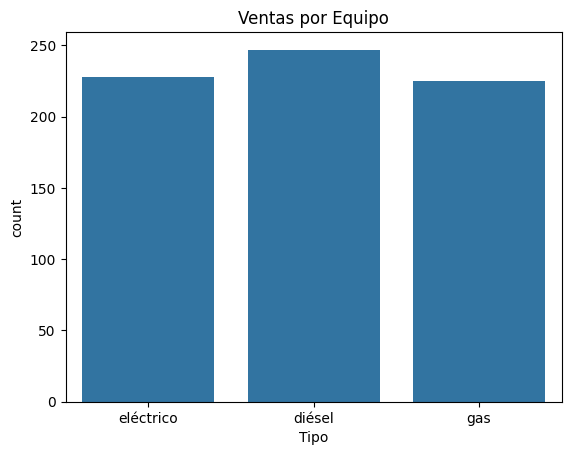

In [20]:
sns.countplot(x='Tipo', data=df)
plt.title('Ventas por Equipo')
plt.show()

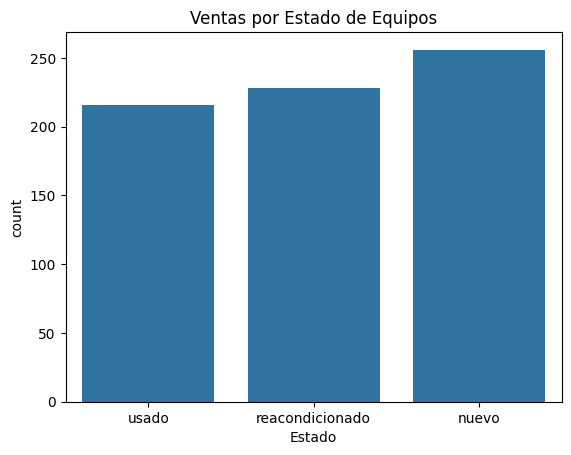

In [21]:
sns.countplot(x='Estado', data=df)
plt.title('Ventas por Estado de Equipos')
plt.show()

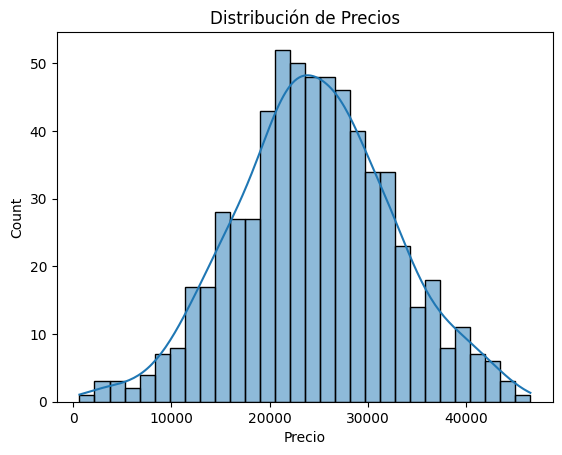

In [23]:
sns.histplot(df['Precio_USD'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.show()